In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score

In [16]:
test = pd.read_csv('https://raw.githubusercontent.com/eatrabyo/dads-6003-firewall-ml/eat/data_source/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/eatrabyo/dads-6003-firewall-ml/eat/data_source/train.csv')

In [17]:
Selected_features = ['Elapsed Time (sec)', 'Packets', 'Destination Port',
                     'NAT Source Port', 'Bytes Received', 'NAT Destination Port']

In [18]:
x_train = train[Selected_features]
y_train = train['Action']
x_test = test[Selected_features]
y_test = test['Action']

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11292
        deny       1.00      1.00      1.00      4496
        drop       1.00      1.00      1.00      3856
  reset-both       0.87      0.81      0.84        16

    accuracy                           1.00     19660
   macro avg       0.97      0.95      0.96     19660
weighted avg       1.00      1.00      1.00     19660

accuracy:0.9988


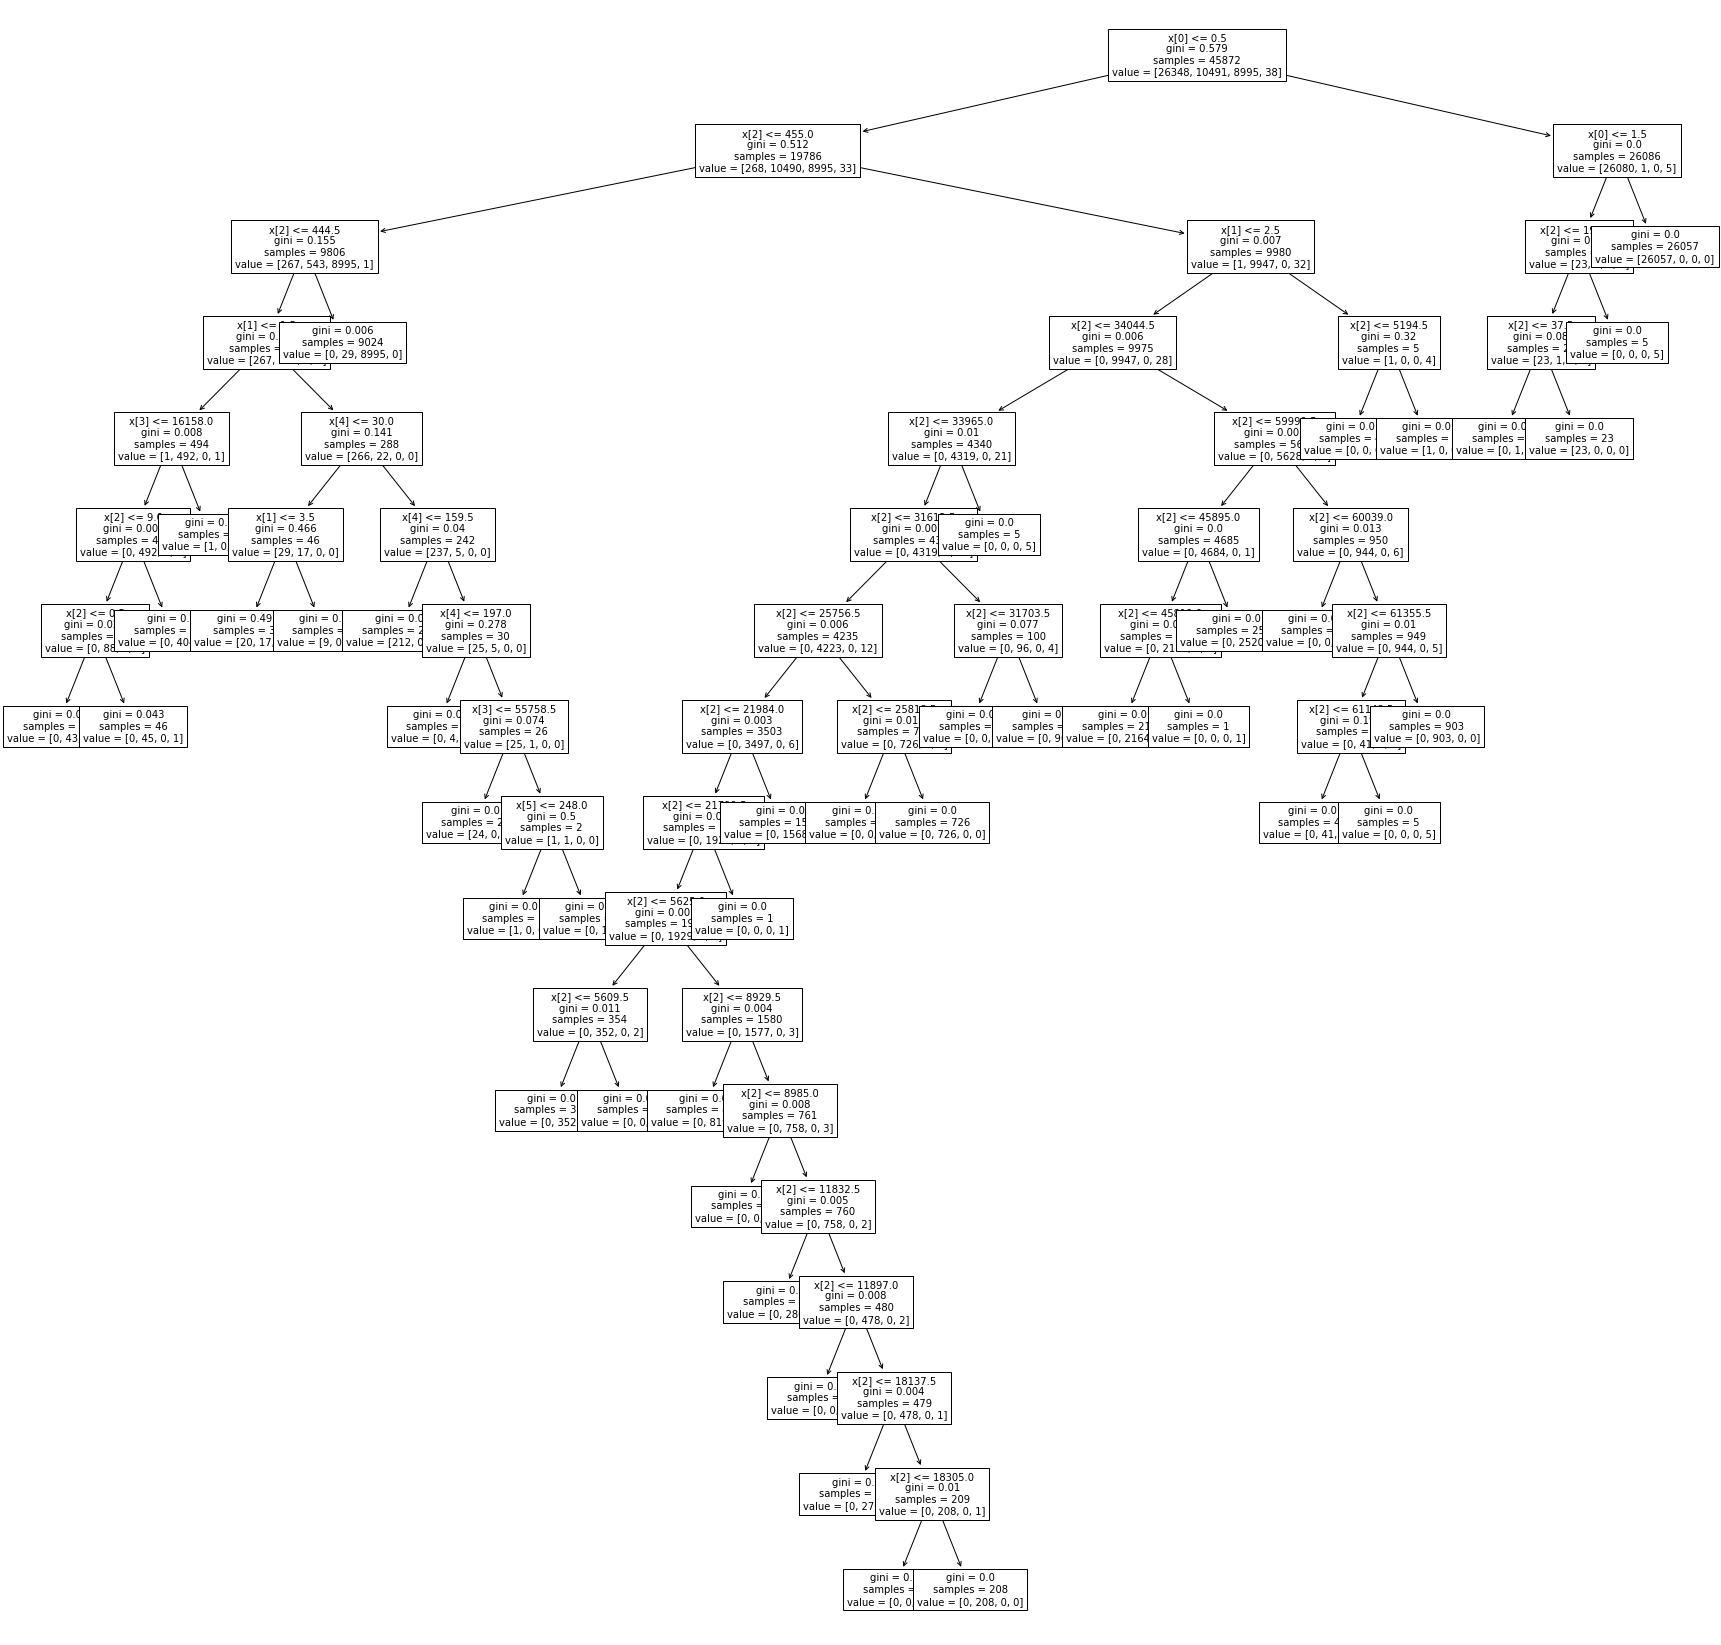

In [21]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
answer=dt.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, answer))
print('accuracy:{:.4f}'.format(dt.score(x_test, y_test)))


plt.figure(figsize=(30,30))
temp = tree.plot_tree(dt, fontsize=10)
plt.show()

In [22]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)

train_yhat = dt.predict(x_train)
train_f1 = f1_score(y_train,train_yhat,average='weighted')

test_yhat = dt.predict(x_test)
test_f1 = f1_score(y_test,test_yhat,average='weighted')

print('Train Score\n',classification_report(y_train,train_yhat))
print('Test Score\n',classification_report(y_test, test_yhat))
print(f"AVG F1-Score Train: {train_f1}\nAVG F1-Score Test: {test_f1}")

Train Score
               precision    recall  f1-score   support

       allow       1.00      1.00      1.00     26348
        deny       1.00      1.00      1.00     10491
        drop       1.00      1.00      1.00      8995
  reset-both       1.00      0.97      0.99        38

    accuracy                           1.00     45872
   macro avg       1.00      0.99      1.00     45872
weighted avg       1.00      1.00      1.00     45872

Test Score
               precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11292
        deny       1.00      1.00      1.00      4496
        drop       1.00      1.00      1.00      3856
  reset-both       0.87      0.81      0.84        16

    accuracy                           1.00     19660
   macro avg       0.97      0.95      0.96     19660
weighted avg       1.00      1.00      1.00     19660

AVG F1-Score Train: 0.9989747319149351
AVG F1-Score Test: 0.9988254703724204
